<a href="https://colab.research.google.com/github/exopas95/data-science-from-scratch/blob/master/1_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 과학자란?
데이터 과학자란 **지저분한 데이터에서 유용한 규칙을 발견하려는 사람들**이다. <br>
데이터과학은 타겟 마켓팅, 조직의 업무 효율성 증진, 공공 보건 개선 등 많은 분야에서 널리 사용되고 있다.


## 1. 핵심 인물 찾기
어떤 사람들이 데이터 과학자인지, 그리고 데이터 과학이 어느 분야에 적용되고 활용되는지를 알아보았으니 이제 실제로 데이터 과학에 대해서 공부해 보자.
먼저 한 집단에 아래 딕셔너리 형태처럼 구성된 10명의 직원들이 각각 고유번호가 있다고 가정해보자. 그리고 각 id의 쌍으로 구성된 친구 관계 데이터인 friendship_pairs가 있다. 예를 들어 firendship_pairs 리스트를 통하여 id가 0인 데이터 과학자 Hero와 id가 1인 데이터 과학자 Dunn이 서로 친구라는 것을 알 수 있다.

In [6]:
users = [
         {"id": 0, "name": "Hero"},
         {"id": 1, "name": "Dunn"},
         {"id": 2, "name": "Sue"},
         {"id": 3, "name": "Chi"},
         {"id": 4, "name": "Thor"},
         {"id": 5, "name": "Clive"},
         {"id": 6, "name": "Hicks"},
         {"id": 7, "name": "Devin"},
         {"id": 8, "name": "Kate"},
         {"id": 9, "name": "Klein"},
]

In [2]:
friendship_pairs = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), 
                    (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

가령, id가 1인 사용자의 모든 친구를 찾으려면 모든 쌍을 순회해야 한다. 더 빠른 탐색을 위해 딕셔너리를 사용해 보자. 사용자 id를 키로 사용하고 해당 사용자의 모든 친구 목록을 값으로 구성한 딕셔너리를 생성해보자.

In [10]:
friendships = {user["id"]: [] for user in users}

for i, j in friendship_pairs:
  friendships[i].append(j)
  friendships[j].append(i)

friendships

{0: [1, 2],
 1: [0, 2, 3],
 2: [0, 1, 3],
 3: [1, 2, 4],
 4: [3, 5],
 5: [4, 6, 7],
 6: [5, 8],
 7: [5, 8],
 8: [6, 7, 9],
 9: [8]}

앞서 구한 friendships 딕셔너리를 활용하여 **네트워크상에서 각 사용자의 평균 연결 수**를 구해보자. 먼저 friendships 안 모든 리스트의 길이를 더해서 총 연결 수를 구한다. 그리고 구한 총 합을 사용자의 수로 나누면 평균을 구할 수 있다.

In [14]:
# user의 친구는 총 몇명인가?
def number_of_friends(user):
  user_id = user["id"]
  friend_ids = friendships[user_id]
  return len(friend_ids)

total_connections = sum(number_of_friends(user) for user in users)
num_users = len(users)
avg_connection = total_connections / num_users
avg_connection

2.4

다음으로 연결 수가 가장 많은 사람, 즉 친구가 가장 많은 사람이 누군지 알아보자. 사용자의 수가 많지 않으므로 '친구가 제일 많은사람'부터 '제일 적은 사람' 순으로 사용자를 정렬해보자.

In [23]:
# 친구 수를 value로 가지고 있는 dictionary 생성
num_friends_by_id = [(user["id"], number_of_friends(user)) for user in users]

# 친구가 제일 많은 사람 순으로 정렬
num_friends_by_id.sort(key=lambda id_and_friends: id_and_friends[1], reverse=True)

[(1, 3),
 (2, 3),
 (3, 3),
 (5, 3),
 (8, 3),
 (0, 2),
 (4, 2),
 (6, 2),
 (7, 2),
 (9, 1)]

## 2. 친구 추천하기
이제 친구 맺기를 더 활발히 하기 위해서 친구 추천 기능을 설계해보자. 사용자의 친구에 대해 그 친구의 친구들을 살펴보고, 사용자의 모든 친구에 대해 똑같은 작업을 반복하고 결과를 저장한다. 

In [41]:
# 친구의 친구들 소개
def foaf_ids_bad(user):
  return [foaf_id for friend_id in friendships[user["id"]] for foaf_id in friendships[friend_id]]

# def foaf_ids_bad(user):
#   temp = []
#   for friend_id in friendships[user["id"]]:
#     for foaf_id in friendships[friend_id]:
#       temp.append(foaf_id)
#   return temp

foaf_ids_bad(users[0])

[0, 2, 3, 0, 1, 3]

위 결과에서 볼 수 있다시피, 현재 친구 추천 기능은 자기 자신을 포함하며, 중복도 포함하는 것을 알 수 있다. 동시에 사용자가 이미 아는 사람을 제외하며 추가적으로 서로가 함께 아는 친구(mutual friends)가 몇 명인지 세어보는 함수를 만들어 보자. 그러면 Chi(id: 3)은 Hero(id: 0)와 함께 아는 친구가 두 명이고, Clive(id: 5)와 함께 아는 친구가 한명이라는 것을 알 수 있다.

In [46]:
from collections import Counter

def friends_of_friends(user):
  user_id = user["id"]
  return Counter(
      foaf_id
      for friend_id in friendships[user_id]
      for foaf_id in friendships[friend_id]
      if foaf_id != user_id                   # 사용자 자신 제외
      and foaf_id not in friendships[user_id]  # 사용자의 친구는 제외
  )

print(friends_of_friends(users[3]))

Counter({0: 2, 5: 1})


## 3. 연봉과 경력
친구 데이터에 이어 각 사용자들의 연봉이 달러로, 근속 기간이 연 단위로 표기되어있는 데이터를 가지고 있다고 해보자. 

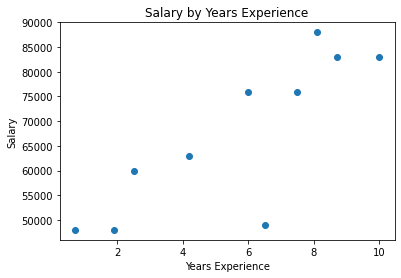

In [54]:
from matplotlib import pyplot as plt

salaries_and_tenures = [(83000, 8.7), (88000, 8.1),
                        (48000, 0.7), (76000, 6),
                        (49000, 6.5), (76000, 7.5),
                        (60000, 2.5), (83000, 10),
                        (48000, 1.9), (63000, 4.2)]

x_value = []
y_value = []

for index in salaries_and_tenures:
  y_value.append(index[0])
  x_value.append(index[1])

plt.xlabel("Years Experience")
plt.ylabel("Salary")
plt.title("Salary by Years Experience")
plt.scatter(x_value, y_value)
plt.show()

이제 경력을 몇개의 구간으로 나누고 각 연봉을 해당 구간에 대응시켜 보자. 그리고 각 구간의 평균 연봉을 구해보면 흥미로운 결과를 얻을 수 있다.

In [63]:
from collections import defaultdict

# 키는 근속 연수, 값은 해당 근속 연수에 대한 연봉 목록
salary_by_tenure = defaultdict(list)
for salary, tenure in salaries_and_tenures:
  salary_by_tenure[tenure].append(salary)

# 키는 근속 연수, 값은 해당 근속 연수의 평균 연봉
average_salary_by_tenure = {
    tenure: sum(salaries) / len(salaries)
    for tenure, salaries in salary_by_tenure.items()
}

# 구간 설정
def tenure_bucket(tenure):
  if tenure < 2:
    return "less than two"
  elif tenure < 5:
    return "between two and five"
  else:
    return "more than five"

# 연봉을 근속 연수 구간에 대응
salary_by_tenure_bucket = defaultdict(list)
for salary, tenure in salaries_and_tenures:
  bucket = tenure_bucket(tenure)
  salary_by_tenure_bucket[bucket].append(salary)

# 키는 근속 연수 기간, 값은 해당 구간에 속하는 사용자들의 평균 연봉
average_salary_by_bucket = {
    tenure_bucket: sum(salaries) / len(salaries)
    for tenure_bucket, salaries in salary_by_tenure_bucket.items()
}
average_salary_by_bucket

{'between two and five': 61500.0,
 'less than two': 48000.0,
 'more than five': 75833.33333333333}

# Appendix

## 1. 파이썬 for문 한줄 쓰기
윗 코드는 for문을 평범하게 작성한 코드이며, 아래 코드는 윗 코드를 한줄로 정리한 코드이다. 처음에는 이해가기가 좀 어렵지만, 순서대로 작성한다고 생각하면 어렵지 않다. 예를 들어 **'i에 2를 곱해서 리스트를 만드는데, 그 i는 for문으로 temp에서 가져와'**라는 식으로 말이다. 

In [19]:
temp = list([2, 3, 4, 5])
temp_new = list()

for i in temp:
  temp_new.append(i * 2)
temp_new

[4, 6, 8, 10]

In [20]:
temp_new = list([i*2 for i in temp])
temp_new

[4, 6, 8, 10]

## 2. Lambda 함수
앞서 for문을 한줄로 써서 사용하는 방법에 대해서 알아보았다. 이번에는 lambda함수를 써서 함수를 한줄로 사용하는 방법에 대해 알아보자. 위 코드는 평범하게 함수를 선언한 코드이며, 아래 코드는 lambda를 사용하여 함수를 한줄로 표현한 코드이다. 표현식은 다음과 같다. <br>

*lambda 인자 : 표현식*





In [21]:
def hap(x, y):
  return x + y

hap(10, 20)

30

In [22]:
(lambda x,y:x+y)(10, 20)

30